# Tasks

### Importing libraries

In [1]:
# import Python Data Analysis Library
import pandas as pd
# import Scikit-Learn Machine Learning Library, contains sample datasets
import sklearn as skl
# import NumPy to manipulate numerical arrays
import numpy as np
# import Matplotlib.PyPlot and Seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# import Matplotlib.colormaps for choosing heatmap colours
from matplotlib import colormaps
# import SciPy for scientific somputing.
import scipy as sp

# Check version numbers of these libraries, for compatibility. 
# If sklearn <1.6.0, must import datasets library explicitly.
# Ref: release notes for Scikit-Learn v1.6 (Dec 2024)
# https://scikit-learn.org/stable/whats_new/v1.6.html#version-1-6-0
print("pandas version", pd.__version__, "sklearn version", skl.__version__)

pandas version 2.2.3 sklearn version 1.6.1


### Library documentation
- [pandas](https://pandas.pydata.org/docs/index.html)
- [sklearn](https://scikit-learn.org/stable/index.html)
- [numpy]
- [matplotlib]
- [seaborn](https://seaborn.pydata.org/)
- [SciPy](https://docs.scipy.org/doc/scipy/tutorial/index.html)

## Task 1: Source the Data Set
### Task Description: 
>Import the Iris data set from the `sklearn.datasets` module.  
>Explain, in your own words, what the `load_iris()` function returns.

The `load_iris()` function returns the contents of the [1936 Fisher iris dataset][iris] as a data structure composed of rows and columns, with the values parsed correctly.

The dataset is a collection of measurements of the sepals and petals of three different related species of iris flower. The dataset consists of measurements of 150 plants, 50 each of three species. Each plant has four measurements - sepal length, sepal width, petal length, and petal width, all in cm. The original data was collected by botanist Edgar Anderson (1936), and used by Fisher (1936) to demonstrate his method of statistical analysis. 

The [documentation][1] for `load_iris()`] indicates that the version of the iris dataset in the UCL Machine Learning Repository contains two wrong data points, when compared with Fisher's original paper. The version of the dataset fetched by `load_iris()` has been corrected.

[1]: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
[iris]: https://archive.ics.uci.edu/dataset/53/iris

Anderson, E. (1936). The species problem in Iris. Annals of the Missouri Botanical Garden, 23(3), 457. https://doi.org/10.2307/2394164  
Fisher, R. A. (1936). THE USE OF MULTIPLE MEASUREMENTS IN TAXONOMIC PROBLEMS. Annals of Eugenics, 7(2), 179–188. https://doi.org/10.1111/j.1469-1809.1936.tb02137.x


In [2]:
# Load the dataset.
dataset = skl.datasets.load_iris()
# Finding the type of what has been returned
print(f"The load_iris function returned an item of type {type(dataset)}")

The load_iris function returned an item of type <class 'sklearn.utils._bunch.Bunch'>


The `load_iris` function returns a data structure of type Bunch. The [scikit-learn documentation for Bunch][bunch] indicates this is a dictionary-like object, so it contains key:value pairs; and Bunch also has the ability to access the values both by key and by attribute.

[bunch]:https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html

In [3]:
# Demonstrating that values can be accessed both by key and by attribute 

# Looking at the values for target_names, accessing them by key
print(f"Target names accessed by key: {dataset["target_names"]}")
# Looking at the values for target_names, accessing them by attribute
print(f"Target names accessed by attribute: {dataset.target_names}")

Target names accessed by key: ['setosa' 'versicolor' 'virginica']
Target names accessed by attribute: ['setosa' 'versicolor' 'virginica']


In [4]:
# Looking at the dataset keys
print("The keys of the Iris dataset are:", dataset.keys(), "\n")

# Checking the type of each part of the dataset
print("Key \t\t\t Type stored")

for key, value in dataset.items():

    # ref for Python F-string formatting:
    # https://docs.python.org/3/library/string.html#formatspec
    print(f"{key:24} {type(value)}")

The keys of the Iris dataset are: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

Key 			 Type stored
data                     <class 'numpy.ndarray'>
target                   <class 'numpy.ndarray'>
frame                    <class 'NoneType'>
target_names             <class 'numpy.ndarray'>
DESCR                    <class 'str'>
feature_names            <class 'list'>
filename                 <class 'str'>
data_module              <class 'str'>


- `data` is an array of measurements taken of each sample flower in this dataset
- `target` is an array containing integers that represent the species of each sample flower
- `frame` (optional) The dataset as a Pandas dataframe (Not present in this dataset as it was not requested when `load_iris()` was called) 
- `target_names` is a list of strings containing the name of each species of iris (i.e. the names of the targets)
- `DESCR` is a few paragraphs describing this dataset, its characteristics, basic statistics, and history
- `feature_names` is a list of the names of the measurements taken of each sample flower (i.e. each feature in `data`)
- `filename` is the name of the file where the data are stored (i.e. where the data was sourced from by `load_iris()`)
- `data_module` is the module wher the data file is stored.

Documentation for the `load_iris()` module is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

In [5]:
# Looking at the targets
dataset.target

# Counting how many instance of each target
# documentation for numpy.unique:
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
target_counts = np.unique(dataset.target, return_counts=True)

print(f"There are {target_counts[1][0]} instances of target index {target_counts[0][0]}, name {dataset.target_names[0]}")
print(f"There are {target_counts[1][1]} instances of target index {target_counts[0][1]}, name {dataset.target_names[1]}")
print(f"There are {target_counts[1][2]} instances of target index {target_counts[0][2]}, name {dataset.target_names[2]}")



There are 50 instances of target index 0, name setosa
There are 50 instances of target index 1, name versicolor
There are 50 instances of target index 2, name virginica


In [6]:
# Looking at the description of the dataset.
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Task 2: Explore the Data Structure

### Task Description
>Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

In [7]:
# Printing the shape of the data set
# Documentation for numpy.shape():
# https://numpy.org/doc/stable/reference/generated/numpy.shape.html
print(f"The NumPy shape() function returns a tuple representing the dimensions of the data array: {dataset["data"].shape}")

print(f"The data array has {dataset['data'].shape[0]} samples and {dataset['data'].shape[1]} features")

The NumPy shape() function returns a tuple representing the dimensions of the data array: (150, 4)
The data array has 150 samples and 4 features


In [8]:
# Looking at the data, first 5 rows
print("The first five rows of the data are:")
print(dataset["data"][:5])

# Looking at the data, last 5 rows
print("The last five rows of the data are:")
print(dataset["data"][-5:])

The first five rows of the data are:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
The last five rows of the data are:
[[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


In [9]:
# Looking at the data feature names
print(dataset["feature_names"])

print("The feature names are the names of each attribute represented in the numeric data. They are:")
for name in dataset["feature_names"]:
    print(name)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The feature names are the names of each attribute represented in the numeric data. They are:
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [10]:
# Looking at the target classes
print(dataset["target_names"])

print("The target classes are the names of the classes to which each set of measurements belongs \n"
"(i.e. the species of iris to which each measured flower belongs.) \nThe classes are:") 
for name in dataset["target_names"]:
    print(name)

['setosa' 'versicolor' 'virginica']
The target classes are the names of the classes to which each set of measurements belongs 
(i.e. the species of iris to which each measured flower belongs.) 
The classes are:
setosa
versicolor
virginica


## Task 3: Summarize the Data
### Task Description:
>For each feature in the dataset, calculate and display:
>- mean
>- minimum
>- maximum
>- standard deviation
>- median

In [11]:
# Get number of data samples and features
n_samples=dataset.data.shape[0]
n_features = dataset.data.shape[1]

# Count number of unique targets 
# documentations for numpy.unique:
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
n_targets = len(np.unique(dataset.target))


In [12]:
# print header line to identify each stat in output
print("Feature \t\tMean \tMin \tMax \tStDev \tMedian")

# For each feature, by index,
for feature in range(0,n_features):

    # Get name of feature
    name = dataset.feature_names[feature]

    # Get stats for feature using NumPy statistics methods, documented here:
    # https://numpy.org/doc/2.2/reference/routines.statistics.html
    mean = np.mean(dataset.data[:,feature])
    min = np.min(dataset.data[:,feature])
    max = np.max(dataset.data[:,feature])
    stdev = np.std(dataset.data[:,feature])
    median = np.median(dataset.data[:,feature])

    # Print out stats for feature
    print(f"{name}\t{mean:.2f}\t{min}\t{max}\t{stdev:.2f}\t{median}")

Feature 		Mean 	Min 	Max 	StDev 	Median
sepal length (cm)	5.84	4.3	7.9	0.83	5.8
sepal width (cm)	3.06	2.0	4.4	0.43	3.0
petal length (cm)	3.76	1.0	6.9	1.76	4.35
petal width (cm)	1.20	0.1	2.5	0.76	1.3


## Task 4: Visualize Features
### Task Description:
>Plot histograms for each feature using matplotlib.  
>Add appropriate titles and axis labels.

### Simple overlaid histograms, as shown in lectures
The four data features are here plotted in four [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). 
Each subplot shows three separately-coloured and overlaid histograms, one 
for each of the target classes. The histogram for each target is called 
separately, so each call calculates separate bin sizes.

The list of colours for each species of iris were chosen from the IBM 
Design Library "colour blind safe" colour palette, accessed through 
[this site](https://davidmathlogic.com/colorblind/#%23648FFF-%23DC267F-%23FFB000)

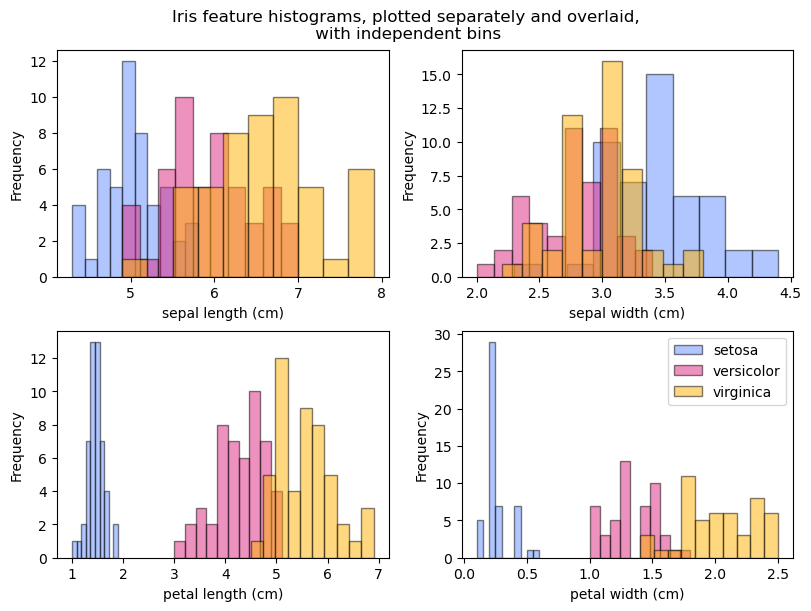

In [13]:
# Set up 2 x 2 subplots, set layout = constrained to keep axis labels
# from clashing with neighbouring plots.
# Ref: https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
fig, ax = plt.subplots(2, 2, layout = "constrained", figsize=(8, 6)) 

# Make list specifying colour for each target, using hex codes:
target_colours = ["#648FFF", "#DC267F", "#FFB000"]

# For each feature, by index (i.e. feature will range from 0 to 3)
for feature in range(0,n_features):

    # set which subplot we are working on, counting from 1
    plt.subplot(2,2,feature + 1)

    # Get name of feature
    name = dataset.feature_names[feature]
    
    # For each species, individially, plot a histogram on this subplot
    for species in range(n_targets):
        # Plot the histogram
        plt.hist(
            dataset.data[dataset.target==species,feature], 
            color=target_colours[species],
            linewidth=1.0, 
            edgecolor="black",
            alpha=0.5,
            label=dataset.target_names[species] 
        )

    # Set the x-axis label to the feature name
    plt.xlabel(name)

    # Set the y-axis label represent frequency in the dataset
    plt.ylabel("Frequency")

# All plots use same colours, so calling legend once, outside the loop
plt.legend()

# Set overall title
fig.suptitle("Iris feature histograms, plotted separately and overlaid,\n with independent bins");

We can see from these histograms that there is a lot of overlap between 
targets when looking at sepal length and sepal width, and in comparison, 
targets are much less overlapped when looking at petal length and petal 
width. 

For petal length and petal width, the Setosa samples are clearly separated 
from the others, while the Versicolor and Viriginica samples overlap slightly.

### Histograms with aligned bins
To plot these histograms again, with aligned bin edges, I needed to supply the 
data for each subplot in a single data structure, so that I can call 
`plt.hist()` once for each subplot, meaning the bins are calculated once and 
applied to all targets. 

The [documentation for `plt.hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) 
states that the input values can be a sequence of arrays; so, for each subplot 
I extracted the feature data for each target and put it into a 
list of 3 arrays, and passed that list to `plt.hist.()`


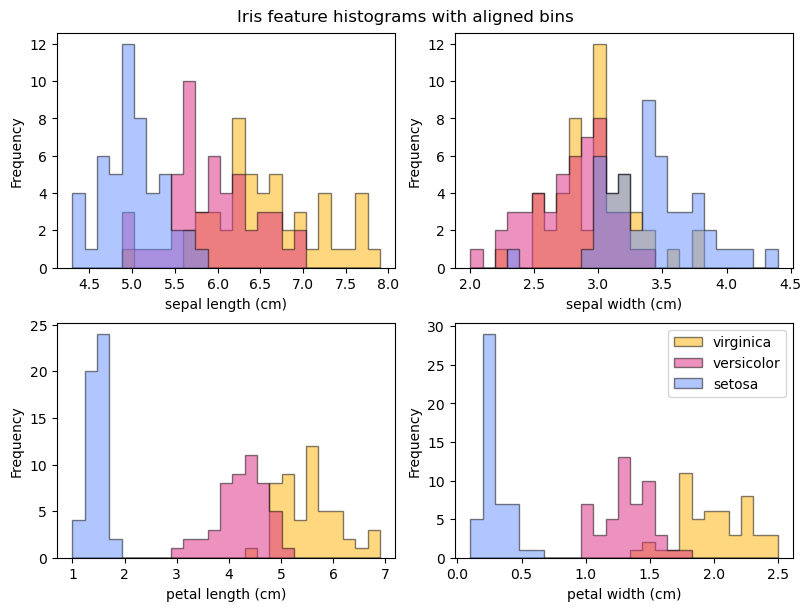

In [14]:
# Plotting iris feature histograms with aligned bins

# Set up 2 x 2 subplots,
fig, ax = plt.subplots(2, 2, layout = "constrained", figsize=(8, 6)) 

# For each iris feature, by index (i.e. feature will range from 0 to 3)
for feature in range(0,n_features):

    # set which subplot we are working on, counting from 1
    plt.subplot(2,2,feature + 1)

    # Get name of feature
    name = dataset.feature_names[feature]
    
    # Put the data to be plotted into a single data structure, 
    # but separated by target
    data_to_plot = [
        dataset.data[dataset.target==0,feature],
        dataset.data[dataset.target==1,feature],
        dataset.data[dataset.target==2,feature],
    ]
    
    # Plot the histogram
    plt.hist(
        data_to_plot, 
        bins=25,
        edgecolor="black",
        color=target_colours,
        linewidth=1.0, 
        histtype='stepfilled', 
        stacked=False, 
        fill=True,
        label=dataset.target_names,
        alpha=0.5
    )

    # Set the x-axis label to the feature name
    plt.xlabel(name)

    # Set the y-axis label to frequency in the dataset
    plt.ylabel("Frequency")

# All plots use same colours, so calling legend once, outside the loop
ax[1][1].legend()

# Set overall title
fig.suptitle("Iris feature histograms with aligned bins");

With aligned bins, the overlaid histograms are a little bit clearer. 
The Setosa species is still the only target that is separated from the others, 
and only in the petal length and petal width features. 

### Histograms with overlaid KDE plot

To help to distinguish between targets in these histograms, I will add a 
[kernel density estimate (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation) 
plot as an estimate of 
the probability density function of each feature, for each target. 

Although this can be done using `pyplot`, the simplest method I have seen is to remake the plots using  
[seaborn](https://seaborn.pydata.org/) as per [this Medium post](https://medium.com/@rgr5882/100-days-of-data-science-day-26-visualizing-histograms-and-density-plots-in-python-3fae52e26d3b).

Unfortunately, with my current data structure,  I cannot see an accurate way 
to pass target labels to `seaborn.histplot()` at this time. If I pass the 
labels manually using `fig.legend(dataset.target_names)`, the legend 
colours appear in reverse order. This seems to be a known result in Seaborn 
([see this discussion on the Seaborn GitHub page.](https://github.com/mwaskom/seaborn/issues/3079))
My attempts here can be seen in older iterations of this notebook.

The [Seaborn documentation page on data structure](https://seaborn.pydata.org/tutorial/data_structure.html) 
indicates that Seaborn works better with long-form rather than wide-form data, 
and implies that a Pandas dataframe is preferred. I will construct a dataframe 
that includes my data and also target information, to use with Seaborn calls
in this notebook.

In [15]:
# Constructing Pandas DataFrame from Iris data, following the example in this 
# StackOverflow comment:
# https://stackoverflow.com/a/76374531 

# start the dataframe by adding the 'data' part of the dataset
df_iris= pd.DataFrame(dataset.data, columns=dataset.feature_names)

# add the target information, but replace the indicators with the species name
df_iris['species'] = pd.Categorical.from_codes(dataset.target, dataset.target_names)

# Show type of data structure
print(type(df_iris))

# Show first 5 lines of the dataframe using pandas.DataFrame.head()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
df_iris.head()

<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


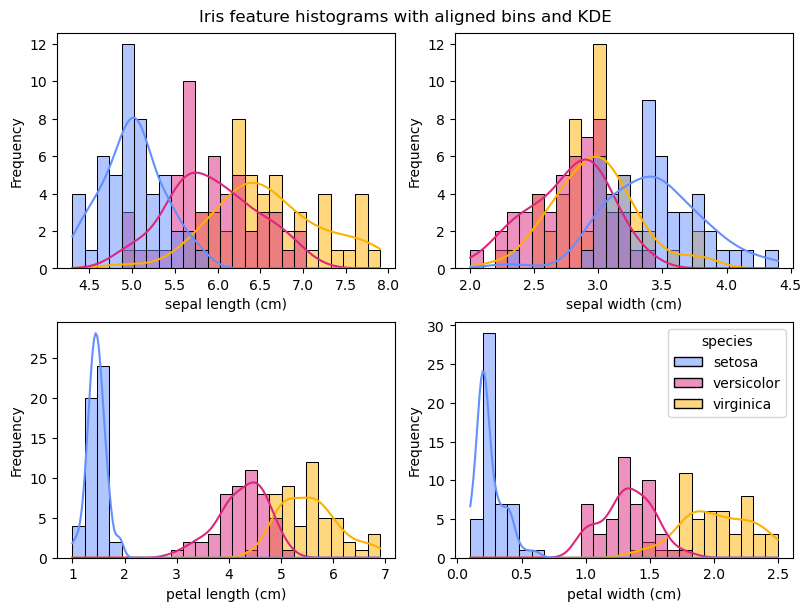

In [16]:
# Plotting histograms with overlaid KDE

# Set up 2 x 2 subplots, set layout = constrained
fig, ax = plt.subplots(2, 2, layout = "constrained", figsize=(8, 6)) 

# For each feature, by index (i.e. feature will range from 0 to 3)
for feature in range(n_features):

    # set which subplot we are working on, counting from 1
    plt.subplot(2,2,feature + 1)

    # Get the name of this feature
    name = dataset.feature_names[feature]
    
    # set number of bins 
    nbins = 25

    # Only plot the legend on the last subplot
    if feature == 3:
        plot_legend = True
    else:
        plot_legend = False

    # Use Seaborn to plot histograms with overlaid KDE
    # ref: https://seaborn.pydata.org/generated/seaborn.histplot.html
    # As data for all targets is called in one plot command, the histogram
    # bins are the same across all three targets
    sns.histplot(
        df_iris, 
        x=name,
        bins=nbins,
        kde=True, 
        hue='species',
        alpha=0.5,
        palette=target_colours,
        edgecolor='black',
        legend=plot_legend
        )

    # Set the x-axis label to the feature name
    plt.xlabel(name)

    # Set the y-axis label represent frequency in the dataset
    plt.ylabel("Frequency")

# Set overall title
fig.suptitle("Iris feature histograms with aligned bins and KDE");

These histograms have aligned bins across the range of each feature, and a KDE ([kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)) overlaid on each histogram. 
Once again, the separation of only Setosa, and only in petal length 
and petal width, is clear.

## Task 5: Investigate Relationships
Task Description:
>Choose any two features from the data set and create a scatter plot of them.  
>Color-code the three different classes of the scatter plot points.

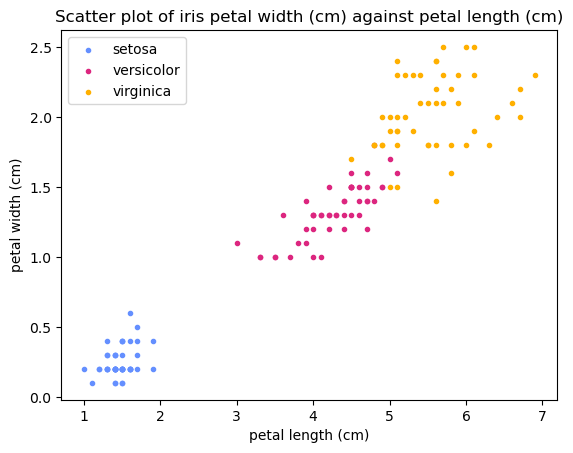

In [17]:
# Choose which features to plot by their index in the data, 
# i.e. sepal length is 0, sepal width is 1, 
# petal length is 2, petal width is 3
x = 2
y = 3

# Adapted from previous code cell for histogram plots
for species in range(n_targets):
    plt.scatter(
        dataset.data[dataset.target==species,x],
        dataset.data[dataset.target==species,y],
        marker='.',
        color=target_colours[species],
        label=dataset.target_names[species]
    )

# Add x-axis label
plt.xlabel(dataset.feature_names[x])

# Add y-axis label
plt.ylabel(dataset.feature_names[y])

# Add plot title
plt.title(
    f"Scatter plot of iris {dataset.feature_names[y]} "
    f"against {dataset.feature_names[x]}"
    )

# Add legend
plt.legend();

## Task 6: Analyze Relationship
>Use `numpy.polyfit` to add a regression line to the scatter plot from Task 5.

In [18]:
# Calculate the coefficients of a linear fit to the scatter plot above
# using data from all targets
# Documentation for numpy.polyfit:
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
slope, intercept = np.polyfit(dataset.data[:,x], dataset.data[:,y], 1)

# Generate a range of x-values and calculate the  corresponding y-values 
# using the linear fit
linfit_x_values = np.arange(1,7,0.001)
linfit_y_values = (linfit_x_values * slope) + intercept


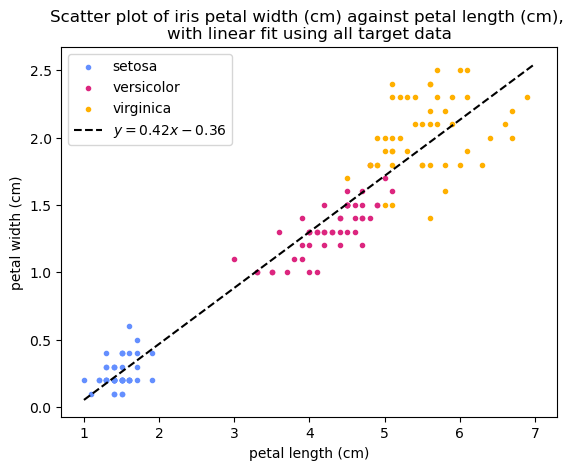

In [19]:
## Plot the data and the linear fit.

# Plot the scatter points
# Copied from previous code cell for scatter plots
for species in range(n_targets):
    plt.scatter(
        dataset.data[dataset.target==species,x],
        dataset.data[dataset.target==species,y],
        marker='.',
        color=target_colours[species],
        label=dataset.target_names[species]
    )

# Plot the linear fit calculated above. 
# add linear fit equation to the legend - note the string format for the 
# intercept displays the + or - sign whether the value of the intercept is 
# positive or negative, so I don't need to have the sign as a string literal.  
# (from https://docs.python.org/3/library/string.html#formatspec)
plt.plot(
    linfit_x_values, 
    linfit_y_values,
    '--', 
    color="black", 
    label=f"$y = {slope:.2}x {intercept:+.2}$" 
    )

# add the title
plt.title(
    f"Scatter plot of iris {dataset.feature_names[y]} "
    f"against {dataset.feature_names[x]}, \n"
    "with linear fit using all target data"
)

# plot the legend, x-axis labels, and y-axis labels
plt.xlabel(dataset.feature_names[x])
plt.ylabel(dataset.feature_names[y])
plt.legend();

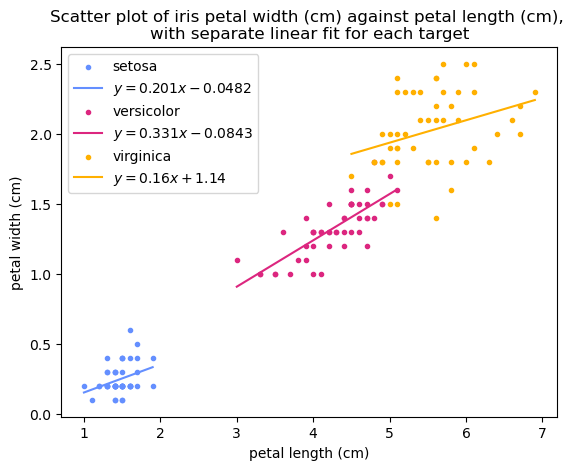

In [20]:
# Calculate the coefficients of a linear fit to the scatter plot above
# using data from each target separately

# Copied from previous code cell for scatter plots
# For each target, by index,
for species in range(n_targets):

    # Calculate the linear fit for this target's data
    slope, intercept = np.polyfit(
        dataset.data[dataset.target==species,x], 
        dataset.data[dataset.target==species,y], 
        1
    )

    # set the linear fit x-values to the lowest and highest x-values in 
    # this targets's dataset
    linfit_x_values = np.arange(
        np.min(dataset.data[dataset.target==species,x]),
        np.max(dataset.data[dataset.target==species,x]),
        0.001
        )
    
    # calculate the corresponding y-values using this linear fit
    linfit_y_values = (linfit_x_values * slope) + intercept

    # plot the scatter plot (as above)
    plt.scatter(
        dataset.data[dataset.target==species,x],
        dataset.data[dataset.target==species,y],
        marker='.',
        color=target_colours[species],
        label=dataset.target_names[species]
    )

    # plot the linear fit in the same colour as this target's
    # scatter plot
    plt.plot(
        linfit_x_values, 
        linfit_y_values, 
        color=target_colours[species],
        label=f"$y = {slope:.3}x {intercept:+.3}$"    
    )

# Add x-xis label, y-axis label, and legend.
plt.xlabel(dataset.feature_names[x])
plt.ylabel(dataset.feature_names[y])
plt.legend()

# add the title, including the names of the features plotted
plt.title(
    f"Scatter plot of iris {dataset.feature_names[y]} "
    f"against {dataset.feature_names[x]}, \n"
    "with separate linear fit for each target"
);


## Task 7: Analyze Class Distributions
>Create box-plots of the petal lengths for each of the three classes.

I am colour-coding the boxplots per species, using the colours set for previous plots, 
by following [this example from matplotlib.org](https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py)

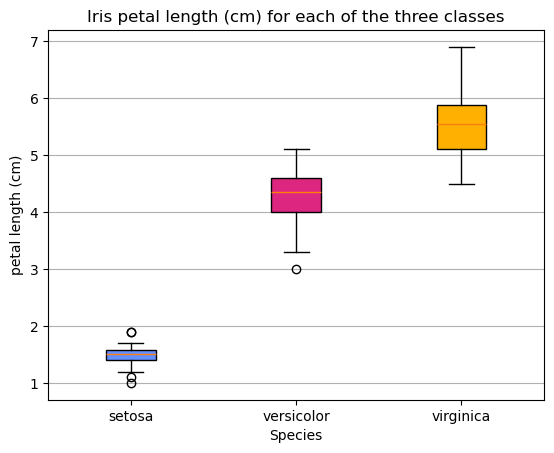

In [21]:
# Petal length has index 2 in the list of features. 
# Can change this statement to plot other features.
feature = 2


# Plotting the boxplot
# Documentation for matplotlib.pyplot.boxplot:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
bplot = plt.boxplot(
    # Input to boxplot() needs to be a 2D array, which I am creating here 
    # by extracting data[:,2] for each target
    [dataset.data[dataset.target==0, feature],
    dataset.data[dataset.target==1, feature],
    dataset.data[dataset.target==2, feature]],
    patch_artist=True,
    tick_labels=dataset.target_names
)

# fill with colors
for patch, color in zip(bplot['boxes'], target_colours):
    patch.set_facecolor(color)

# setting labels for the x-axis:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html
plt.xlabel("Species")

# set ylabel by getting the name of this feature
plt.ylabel(dataset.feature_names[feature])

# add gridlines to y-axis
plt.grid(axis='y')

# add plot title
plt.title(f"Iris {dataset.feature_names[feature]} for each of the three classes");


## Task 8: Compute Correlations
> Task Description: Calculate the correlation coefficients between the features.  
> Display the results as a heatmap using matplotlib.

In [22]:
# Can calculate the correlation matrix using pandas.DataFrame.corr()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# First need to drop the "species" column from the dataframe, as it contains
# non-numeric values
correlation_matrix = df_iris.drop("species", axis=1).corr()

# Show the matrix
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Text(0.5, 1.0, 'Correlation coefficients between iris features')

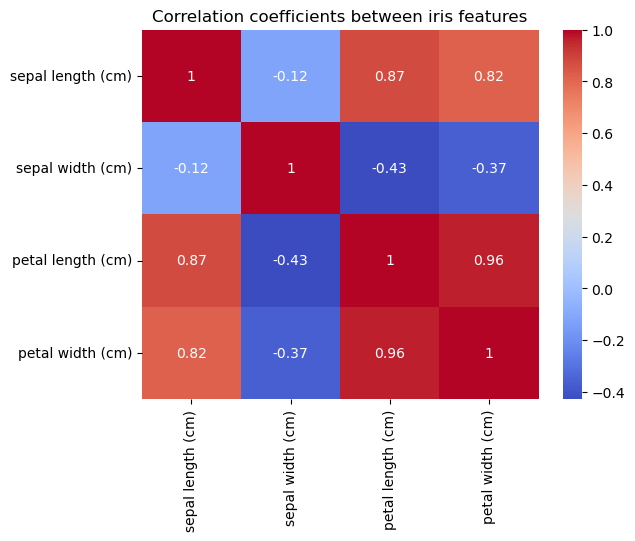

In [23]:
### Can also calculate correlation coefficents, and plot the heatmap, all in
# one step using seaborn.heatmap()

# Seaborn Heatmap documentation
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Guide to MatPlotLib Colormaps (this heatmap uses the coolwarn colormap)
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

sns.heatmap(df_iris.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')

plt.title("Correlation coefficients between iris features")


## Task 9: Fit a Simple Linear Regression
>Task Description: For your two features in Task 5, calculate the coefficient of determination $R^2$.   
>Re-create the plot from Task 6 and annotate it with the R 2 value.

In [24]:
# My features from Task 5 are still called by the x and y variables
print(f"{x=}, {dataset.feature_names[x]}")
print(f"{y=}, {dataset.feature_names[y]}")

x=2, petal length (cm)
y=3, petal width (cm)


In [25]:
# Use scipy.stats.linregress to fit the linear regression and extract the 
# parameters of the fit

# Fit to all targets
fit_all = sp.stats.linregress(dataset.data[:,x], dataset.data[:,y])

# Show result
print(f"{fit_all.rvalue = }")


fit_all.rvalue = 0.9628654314027963


In [26]:
# Create a dict to hold the linear fit values for each individual species
fit_by_species = {}

# Repeat the linear regression fit to each species individually
for species in range(n_targets):
    name = dataset.target_names[species]

    # Fit to data for just this species and these features
    # using scipy.stats.linregress()
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress
    fit = sp.stats.linregress(
        dataset.data[dataset.target==species,x], 
        dataset.data[dataset.target==species,y]
    )

    # the linregress function returns rvalue which is the Pearson correlation 
    # coefficient. Square this to get the R^2 value, and store it in this dict
    # with the key of species name
    fit_by_species[name] = {
        "slope" : fit.slope, 
        "intercept" : fit.intercept, 
        "r_squared" : fit.rvalue ** 2
        }

# Show results
print(fit_by_species)


{'setosa': {'slope': 0.2012450940587359, 'intercept': -0.048220327513871925, 'r_squared': 0.10997848396374127}, 'versicolor': {'slope': 0.331053604436229, 'intercept': -0.08428835489833553, 'r_squared': 0.6188466815001423}, 'virginica': {'slope': 0.1602969554030875, 'intercept': 1.1360313036020584, 'r_squared': 0.1037537027504861}}


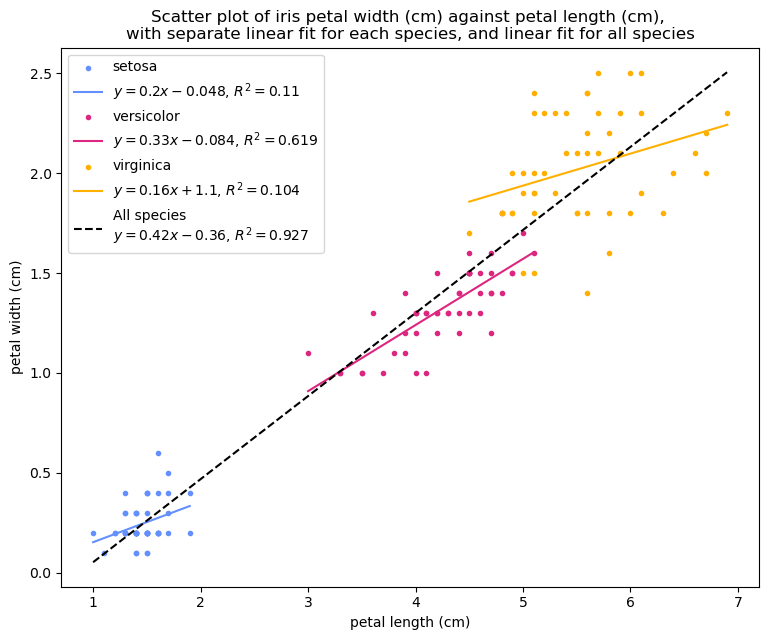

In [27]:
# Recreate plot from Task 6 and add Rˆ2 values. 

# Set slightly larger figure size to fit in the legend
plt.figure(figsize = (9,7))

# for each species, by index,
for species in range(n_targets):

    # get species name string
    name = dataset.target_names[species]

    # plot the scatter plot (as above)
    plt.scatter(
        dataset.data[dataset.target==species,x],
        dataset.data[dataset.target==species,y],
        marker='.',
        color=target_colours[species],
        label=dataset.target_names[species]
    )

    # set the linear fit x-values to the lowest and highest x-values in 
    # this targets's dataset
    linfit_x_values = np.arange(
        np.min(dataset.data[dataset.target==species,x]),
        np.max(dataset.data[dataset.target==species,x]),
        0.001
        )

    # calculate the corresponding y-values by recalling the fit parameters
    # calculated above
    linfit_y_values = (
        fit_by_species[name]["slope"] * linfit_x_values
        + fit_by_species[name]["intercept"]
    )

    # plot the linear fit in the same colour as this target's scatter plot, 
    # and label the fit with its parameters and R^2 value
    plt.plot(
        linfit_x_values, 
        linfit_y_values, 
        color=target_colours[species],
        label=(
            f"$y = {fit_by_species[name]["slope"]:.2}x {fit_by_species[name]["intercept"]:+.2}$, "
            f"$R^2 = {fit_by_species[name]["r_squared"]:.3}$"    
        )
    )


## Plot the linear fit over all species data
# for the overall fit, set the linear fit x-values to the lowest and highest 
# x-values for this feature, for all targets
linfit_x_values = np.arange(
    np.min(dataset.data[:,x]),
    np.max(dataset.data[:,x]),
    0.001    
    )

# calculate the corresponding y-values using the overall fit parameters
linfit_y_values = fit_all.slope * linfit_x_values + fit_all.intercept

# plot the overall linear fit in black 
plt.plot(
    linfit_x_values, 
    linfit_y_values,
    '--', 
    color="black", 
    label=("All species \n"
        f"$y = {fit_all.slope:.2}x {fit_all.intercept:+.2}$, "
        f"$R^2 = {fit_all.rvalue **2:.3}$"    
    )
)

# Add x-axis label, y-axis label, and legend.
plt.xlabel(dataset.feature_names[x])
plt.ylabel(dataset.feature_names[y])
plt.legend()

# add the title
plt.title(
    f"Scatter plot of iris {dataset.feature_names[y]} "
    f"against {dataset.feature_names[x]}, \n"
    "with separate linear fit for each species, "
    "and linear fit for all species"
);


## General Reference:  
[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/datasets)  
[Markdown syntax](https://markdownguide.offshoot.io/cheat-sheet/)
[PEP 8 – Style Guide for Python Code](https://peps.python.org/pep-0008/)

## End of Notebook